In [1]:
!pip install bayesian-optimization

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from bayes_opt import BayesianOptimization

%matplotlib inline
sns.set()

In [3]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [4]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [5]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [6]:
y = df['Satisfaction_Score']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from IPython.display import Audio
sound_file = 'http://www.soundjay.com/button/beep-07.wav'
Audio(sound_file, autoplay=True)

In [10]:
begin_time = datetime.datetime.now()
from sklearn import metrics
param_grid = {
    'learning_rate': [0.1, 0.25, 0.5, 0.75],
    'n_estimators': np.arange(10,70,20),
    'max_depth': np.arange(5,115,20),
    'min_samples_split': np.arange(2,127,25)}
def gb_fit(learning_rate, n_estimators, max_depth, min_samples_split):
    gb = GradientBoostingClassifier(
        learning_rate = float(learning_rate), 
        n_estimators = int(n_estimators), 
        max_depth = int(max_depth),
        min_samples_split = int(min_samples_split),
        random_state=42, 
        verbose=1)
    train_gb = gb.fit(x_train,y_train)
    y_pred = train_gb.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    return rmse

In [11]:
gbBO = BayesianOptimization(gb_fit, {
    'learning_rate': (0.1, 0.75),
    'n_estimators': (10,70),
    'max_depth': (5,105),
    'min_samples_split': (2,102)})
gbBO.maximize(n_iter=12, init_points=4)

|   iter    |  target   | learni... | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------------------
      Iter       Train Loss   Remaining Time 
         1        3443.4655           29.70s
         2        2630.3523           46.50s
         3        2049.6404           50.68s
         4        1643.3565           51.22s
         5        1341.6072           52.17s
         6        1106.0622           52.95s
         7         917.6239           59.62s
         8         765.6876            1.12m
         9         644.0075            1.16m
        10         544.3523            1.15m
        20         112.4066           29.62s
|  1        |  4.297    |  0.1208   |  67.36    |  13.1     |  27.67    |
      Iter       Train Loss   Remaining Time 
         1        4427.1296           45.28s
         2    31040621.6052            1.13m
         3    31040068.3843            1.17m
         4    31045180.8035            1.26m
         5 

         5 111646672814560063955893244571279806048360813932118567993049773869896063115911036672858303909291781086462367618401037259827481934610509161033629696.0000            1.58m
         6 115293713331403605322457040399257928571860807381537526755834394435602663917372171613448010314122962036673526548091637434581366572286081323746983936.0000            1.54m
         7 115293713331403605322457040399257928571860807381537526755834394435602663917372171613448010314122962036673526548091637434581366572286081323746983936.0000            1.49m
         8 115293713331403605322457040399257928571860807381537526755834394435602663917372171613448010314122962036673526548091637434581366572286081323746983936.0000            1.44m
         9 18870645336463759723697925256199894334165541868340864843663433558141563523850139651033536154865136088320400803855487062304196867639863179832299880448.0000            1.38m
        10 3056014382032115166866900010189321091623839694967953284224435455850421929603784042

        20 27878506984482243149884611090881437135912681703318470429029131878783343901054567618577861576291521717023912345454652505030206245204652214101753192251392.0000           53.58s
        30 27878506984482243149884611090881437135912681703318470429029131878783343901054567618577861576291521717023912345454652505030206245204652214101753192251392.0000           32.83s
        40 27878506984482243149884611090881437135912681703318470429029131878783343901054567618577861576291521717023912345454652505030206245204652214101753192251392.0000           15.73s
        50 27878506984482243149884611090881437135912681703318470429029131878783343901054567618577861576291521717023912345454652505030206245204652214101753192251392.0000            0.00s
|  10       |  5.046    |  0.586    |  39.07    |  37.43    |  50.06    |
      Iter       Train Loss   Remaining Time 
         1        4635.0390           45.14s
         2 162154453559234.0938            1.01m
         3 162194082337006.4062           

         2 10421185371628.9492            1.07m
         3 10421207668124.8516            1.17m
         4 8967283985137448256228000572690314492165419930589593600.0000            1.19m
         5 8967283985137448256228000572690314492165419930589593600.0000            1.20m
         6 8967283985137448256228000572690314492165419930589593600.0000            1.20m
         7 910207425204719600112915610257892883194238846911616484372395383571146080256.0000            1.20m
         8 1062882490937029939162499321838511129643916990989640227353884703609829038217450582699933696.0000            1.19m
         9 1062882490937313313162136738230827017230276143232882702531201202880808413906438698230087680.0000            1.19m
        10 1062882490937313313162136738230827017230276143232882702531201202880808413906438698230087680.0000            1.19m
        20 6351837757608869803304986759241341520729240982453265730083644260604474410911448279017633219568091974477667112738246557654314282675243941712694

In [12]:
gbBO.max
Audio(sound_file, autoplay=True)

In [13]:
test_params = gbBO.max['params']
test_params['max_depth'] = int(round(test_params['max_depth'],0))
test_params['min_samples_split'] = int(round(test_params['min_samples_split'],0))
test_params['n_estimators'] = int(round(test_params['n_estimators'],0))

In [14]:
test_gb = GradientBoostingClassifier(random_state=42, 
                                verbose=1, 
                                **test_params)
test_gb.fit(x_train,y_train)
y_pred = test_gb.predict(x_test)
wall_clock = datetime.datetime.now() - begin_time

      Iter       Train Loss   Remaining Time 
         1        4744.0695            1.17m
         2    14092596.6943            1.30m
         3 794955841101476720262158781933170613813248.0000            1.40m
         4 41478397643210158134644200430314178322102222848.0000            1.45m
         5 1224344964165347133805056768257736519499909258386677436378349685307042097489275164937723668231312850267668480.0000            1.48m
         6 20752403527331335743896614936449283198249266765301666857028808948552058067770576837584201493743295140275163529169055956593717280768.0000            1.49m
         7 430802420160001498798266337230819126679072699829252084822568320991572683270797931611022083033733403066052733960078172475775870266726439346952453750784.0000            1.50m
         8 454170846913505818197658638230985184331549822517817633064387375861947395180919423512104054607744991938772792585935448323382055156835227096992043761664.0000            1.46m
         9 45417084691351008837

In [15]:
print(x_test.shape, np.shape(y_pred))

(522, 247) (522,)


In [16]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 5.334051675761446 
 MAE: 4.057471264367816


In [17]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


30


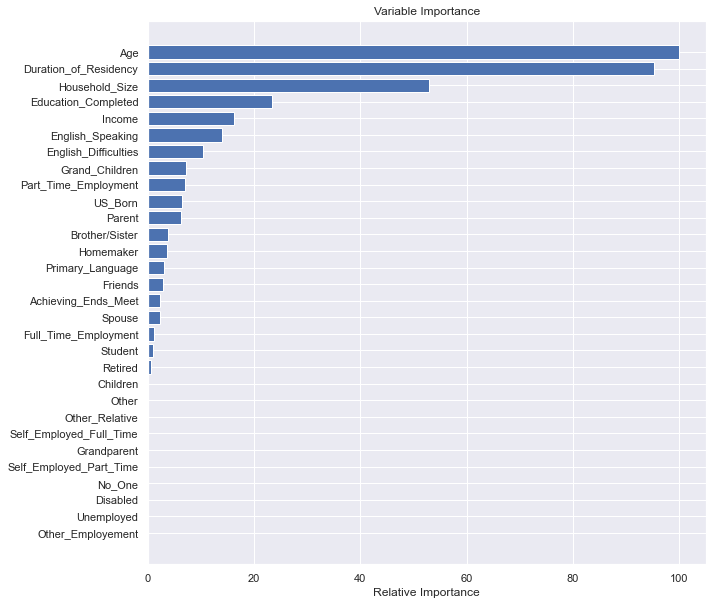

In [18]:
feature_importance = test_gb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.0.4 - trial 2- Scaled Gradient Boosting with Bayesian Optimization.png')

In [19]:
import csv
model_name = 'Model 4.0.4 - Gradient Boosting with Bayesian Optimization'
values = [model_name,
          test_gb,
          np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
          metrics.mean_absolute_error(y_test, y_pred), 
          wall_clock]
out = csv.writer(open("Model 4.0.4 Performance Metrics - trial 1.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(values)

316